## GOAL & OVERVIEW

 - Text message spam detection filter: 
   - Predict **which messages are spam** (not "ham"!)
 - Example has corollaries with general insurance
 - Naive Bayes is easy to fit and has fast convergence with wide/short datasets!

## Intro on Naive Bayes Assumption

Regular **Bayes** Theorem:

\begin{align}
P(B|\underline{A}) &= \frac{P(\underline{A} \cap B)}{P(\underline{A})} \\
&= \frac{P(\underline{A}|B)P(B)}{P(\underline{A})} \\
&= \frac{P(A_1,A_2..A_n|B)P(B)}{P(\underline{A})} \\
&\propto P(A_1,A_2..A_n|B)
\end{align}

#### Will I swim today?  

Set: $B = Swim$ and $\underline{A} = WeatherConditions$

**Naive Bayes** Assumption of Independence:

\begin{align}
P(Swim|WeatherCond) &\propto P(WeatherCond|Swim) \\
&= P(Sunny,LightSwell,NoSharkSightings|Swim) \\
\textbf{naive assumption:} &=P(Sunny|Swim)P(LightSwell|Swim)P(NoSharkSightings|Swim)
\end{align}

Each of these probabilities can be easily calculated.. e.g. $P(Sunny|Swim)$ is 99.99% !!

## About the data

#### Data source:
Compilation of text messages from various sources, including Singaporeans mostly students attending the University  
Source: [UCI](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

## Setup

In [652]:
import pandas as pd
import numpy as np
import random as random  # For randomly sampling from lists
import re as re          # regrex package for string splitting
import matplotlib.pyplot as plt
from sklearn.model_selection         import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes             import MultinomialNB
from sklearn.linear_model            import SGDClassifier
from sklearn.metrics                 import accuracy_score, precision_score, recall_score, f1_score

In [655]:
###  --- Read in data  --- 
data_in = pd.read_table('/Users/Administrator/Documents/Work/pylearn/Bayes/smsspamcollection/SMSSpamCollection',
                        sep='\t',
                        names = ['label','sms_message'])
data_in['label'] = data_in.label.map({'ham': 0, 'spam': 1})

## Quick Summary Results

In [641]:
### --- View Data --- 
pd.set_option('display.max_colwidth', 80)
data_mod = data_in
data_mod

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e bu..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA ...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound pr...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other suggestions?"
5570,0,The guy did some bitching but I acted like i'd be interested in buying somet...


In [642]:
### --- Derive quick-view results ---
quick_summary = data_in.groupby(["label"]).count()
spam_frac     = np.array(quick_summary)[1][0] / (np.array(quick_summary)[1][0] + np.array(quick_summary)[0][0])

In [643]:
### --- PRINT quick-view results ---
print(quick_summary)
print('Spam fraction is : ',format(spam_frac*100,".2f"),"%")

       sms_message
label             
0             4825
1              747
Spam fraction is :  13.41 %


## Subset data into train/test and predictors/response

In [645]:
X_train_raw, X_test, y_train_raw, y_test = train_test_split(data_mod['sms_message'], 
                                                            data_mod['label'], 
                                                            random_state=1)

X_train = X_train_raw
y_train = y_train_raw

print('Number of rows in the train set: {}'.format(X_train.shape[0]))
print('Number of rows in the test  set: {}'.format(X_test.shape[0]))


Number of rows in the train set: 4179
Number of rows in the test  set: 1393


## Apply Sci-Kit Learn's 'string tokeniser'
#### This will convert a string into a list of tokens using different strategies ([visual example](https://www.educative.io/edpresso/countvectorizer-in-python))

In [646]:
count_vector  = CountVectorizer()
dat_train_names = count_vector.fit(X_train).get_feature_names()
print('Sample of names from \'dat_train_names\'  is: \n',sorted(random.sample(dat_train_names,10)))

Sample of names from 'dat_train_names'  is: 
 ['1500', 'chinese', 'cutter', 'er', 'opener', 'persons', 'petey', 'replacement', 'role', 'vijay']


## Simple initial run (full dataset)

In [647]:
count_vector  = CountVectorizer()
training_data = count_vector.fit_transform(X_train)
# print(training_data)

In [567]:
testing_data = count_vector.transform(X_test)
# print(testing_data)

In [568]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train);

In [569]:
naive_pred = naive_bayes.predict(testing_data)
# naive_pred

In [570]:
print('Accuracy score:  ', format( accuracy_score(y_test,naive_pred),".4f"))
# print('Precision score: ', format(precision_score(y_test,naive_pred),".4f"))
# print('Recall score:    ', format(   recall_score(y_test,naive_pred),".4f"))
print('F1 score:        ', format(       f1_score(y_test,naive_pred),".4f"))

Accuracy score:   0.9885
F1 score:         0.9560


## Examine most important words (Naive Bayes)

In [571]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [572]:
show_most_informative_features(count_vector,naive_bayes, 20)

	-9.9328	0125698789     		-3.6984	to             
	-9.9328	1030           		-4.3270	call           
	-9.9328	1120           		-4.5437	you            
	-9.9328	116            		-4.6395	your           
	-9.9328	1205           		-4.8639	free           
	-9.9328	128            		-4.8639	for            
	-9.9328	130            		-4.8702	the            
	-9.9328	140            		-4.9700	now            
	-9.9328	1405           		-4.9770	or             
	-9.9328	15             		-5.1879	txt            
	-9.9328	15pm           		-5.2143	is             
	-9.9328	1680           		-5.2981	on             
	-9.9328	180            		-5.3078	ur             
	-9.9328	1843           		-5.3078	have           
	-9.9328	1apple         		-5.3177	from           
	-9.9328	1cup           		-5.3276	text           
	-9.9328	1hr            		-5.3478	stop           
	-9.9328	1im            		-5.3789	and            
	-9.9328	1lemon         		-5.4219	mobile         
	-9.9328	1mega          		-5.4442	with           


## Vary sample size to analyse convergence rates

#### Useful definitions we will refer back to:
**Precision:** What proportion of positive identifications was actually correct?  
**Precision:** TP / (TP + FP)
    --> simple optimisation: reduce volume of positive predictions
    
**Recall:** What proportion of actual positives was identified correctly?  
**Recall:** TP / (TP + FN)
    --> simple optimisation: increase volume of positive predictions
    
**f1-score:** Harmonic mean of Precision and Recall  
**f1_score:** (Precision * Recall) / ((1/2) * (Precision + Recall))

**Accuracy:** What proportion of all predictions are correct  
**Accuracy:** (TP + TN) / #\_Pred

In [573]:
Set samples to analyse ---
sample_sizes = [
    10,20,30,40,50,75,100,125,150,
    200,250,300,500,700,1000,1120,
    1500,2000,3000,4179
     ]
# sample_sizes

In [580]:
### --- Fit, predict and save scores for each sample Size ---
random.seed(2)
Results = []
row = 0
for i in zip(sample_sizes):
    
    sampled = pd.DataFrame({"y_train_raw": y_train_raw,
                            "X_train_raw": X_train_raw}
                          ).sample(n = i[0])
    
    X_train = sampled["X_train_raw"]
    y_train = sampled["y_train_raw"]
    
    count_vector  = CountVectorizer()
    training_data = count_vector.fit_transform(X_train)
    testing_data  = count_vector.transform(X_test)
   
    ### NAIVE BAYES
    ### Instantiate and fit model 
    naive_bayes = MultinomialNB()
    naive_bayes.fit(training_data,y_train)
    
    ### Predict Model
    naive_pred = naive_bayes.predict(testing_data)
    
    ### LINEAR MODEL
    ### Instantiate and fit model 
    lm_model = SGDClassifier()
    lm_model.fit(training_data , y_train)
    
    ### Predict Model
    lm_model_pred = lm_model.predict(testing_data)

    Results.append(
                    {
                        'Sample_Size'  : i[0],
                        'Feature_set'  : training_data.shape[1],
                        
                        'NB_train_f1'  : f1_score(       y_train,naive_bayes.predict(training_data)),
                        'NB_test_f1'   : f1_score(       y_test ,naive_bayes.predict(testing_data)),
                        
                        'LM_train_f1'  : f1_score(       y_train,   lm_model.predict(training_data)),
                        'LM_test_f1'   : f1_score(       y_test ,   lm_model.predict(testing_data)),
                        
                        
#                         'NB_train_acc' : accuracy_score( y_train,naive_bayes.predict(training_data)),
                        'NB_test_acc'  : accuracy_score( y_test ,naive_bayes.predict(testing_data)),
                        
#                         'LM_train_acc' : accuracy_score( y_train,   lm_model.predict(training_data)),
                        'LM_test_acc'  : accuracy_score( y_test ,   lm_model.predict(testing_data)),
                        
                        
#                         'NB_train_prec': precision_score(y_train,naive_bayes.predict(training_data)),
                        'NB_test_prec' : precision_score(y_test ,naive_bayes.predict(testing_data)),
                        
#                         'LM_train_prec': precision_score(y_train,   lm_model.predict(training_data)),
                        'LM_test_prec' : precision_score(y_test ,   lm_model.predict(testing_data)),
                        
                        
#                         'NB_train_rec' : recall_score(   y_train,naive_bayes.predict(training_data)),
                        'NB_test_rec'  : recall_score(   y_test ,naive_bayes.predict(testing_data)),
                        
#                         'LM_train_rec' : recall_score(   y_train,   lm_model.predict(training_data)),
                        'LM_test_rec'  : recall_score(   y_test ,   lm_model.predict(testing_data)),
                        
                    })
    
    row = row + 1
    
Results = pd.DataFrame(Results)

## View results

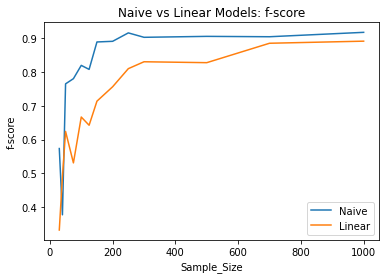

In [649]:
### --- f-score ---
%matplotlib inline
plot_dat = Results
plot_dat = Results[(Results["Sample_Size"] > 20) & (Results["Sample_Size"] <= 1000)]
my_plot  = plt.plot(plot_dat["Sample_Size"],plot_dat.filter(regex = 'test_f1') )
plt.legend(iter(my_plot), ('Naive', 'Linear'))
plt.xlabel('Sample_Size')
plt.ylabel('f-score')
plt.title('Naive vs Linear Models: f-score');


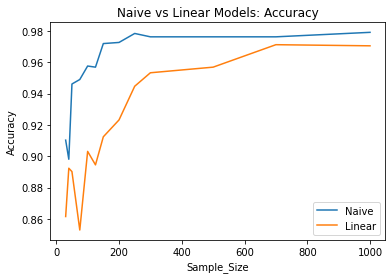

In [650]:
### --- Accuracy ---
%matplotlib inline
plot_dat = Results
plot_dat = Results[(Results["Sample_Size"] > 20) & (Results["Sample_Size"] <= 1000)]
my_plot  = plt.plot(plot_dat["Sample_Size"],plot_dat.filter(regex = 'test_acc') )
plt.legend(iter(my_plot), ('Naive', 'Linear'))
plt.xlabel('Sample_Size')
plt.ylabel('Accuracy')
plt.title('Naive vs Linear Models: Accuracy');


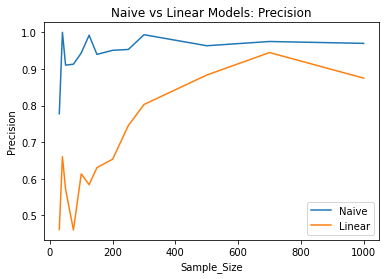

In [660]:
### --- Accuracy ---
%matplotlib inline
plot_dat = Results
plot_dat = Results[(Results["Sample_Size"] > 20) & (Results["Sample_Size"] <= 1000)]
my_plot  = plt.plot(plot_dat["Sample_Size"],plot_dat.filter(regex = 'test_prec') )
plt.legend(iter(my_plot), ('Naive', 'Linear'))
plt.xlabel('Sample_Size')
plt.ylabel('Precision')
plt.title('Naive vs Linear Models: Precision');


In [658]:
###  --- Print table of results (CUT DOWN) --- 
# pd.DataFrame(Results)
# pd.DataFrame(Results.filter(regex = 'Sample|set|test_f1'))

In [659]:
###  --- Print table of results (FULL) --- 
pd.DataFrame(Results)
pd.DataFrame(Results.filter(regex = 'Sample|set|test'))

,Sample_Size,Feature_set,NB_test_f1,LM_test_f1,NB_test_acc,LM_test_acc,NB_test_prec,LM_test_prec,NB_test_rec,LM_test_rec
0,10,110,0.461538,0.385827,0.854271,0.776023,0.453125,0.303406,0.470270,0.529730
1,20,218,0.415385,0.280374,0.890883,0.834171,0.720000,0.330882,0.291892,0.243243
2,30,252,0.573379,0.332180,0.910266,0.861450,0.777778,0.461538,0.454054,0.259459
3,40,367,0.377193,0.489796,0.898062,0.892319,1.000000,0.660550,0.232432,0.389189
4,50,393,0.764890,0.624079,0.946159,0.890165,0.910448,0.572072,0.659459,0.686486
5,75,648,0.780186,0.530892,0.949031,0.852836,0.913043,0.460317,0.681081,0.627027
6,100,712,0.819572,0.666667,0.957645,0.903087,0.943662,0.613636,0.724324,0.729730
7,125,820,0.807692,0.642336,0.956927,0.894472,0.992126,0.584071,0.681081,0.713514
8,150,943,0.888889,0.713615,0.972003,0.912419,0.939759,0.630705,0.843243,0.821622
9,200,1220,0.890805,0.756264,0.972721,0.923187,0.950920,0.653543,0.837838,0.897297
